In [1]:
setwd('/import/GSE213982_fel/')

In [2]:
sce = readRDS('./final.rds')

In [4]:
Idents(sce) = 'group'

### 男性

In [65]:
count = subset(sce,idents =  'M')


   Case Control 
  43347   35711 


        Ast         End         ExN         InN         Mic         Mix 
0.070859369 0.005211364 0.557287055 0.222608718 0.010637760 0.013648208 
        OPC         Oli 
0.045776519 0.073971009 

     
       Case Control
  Ast  1896    3706
  End   183     229
  ExN 26482   17576
  InN  9912    7687
  Mic   519     322
  Mix   433     646
  OPC  1499    2120
  Oli  2423    3425

       factor(Condition)Control
Down                          0
NotSig                        8
Up                            0


     Down NoSignifi 
        2         6 

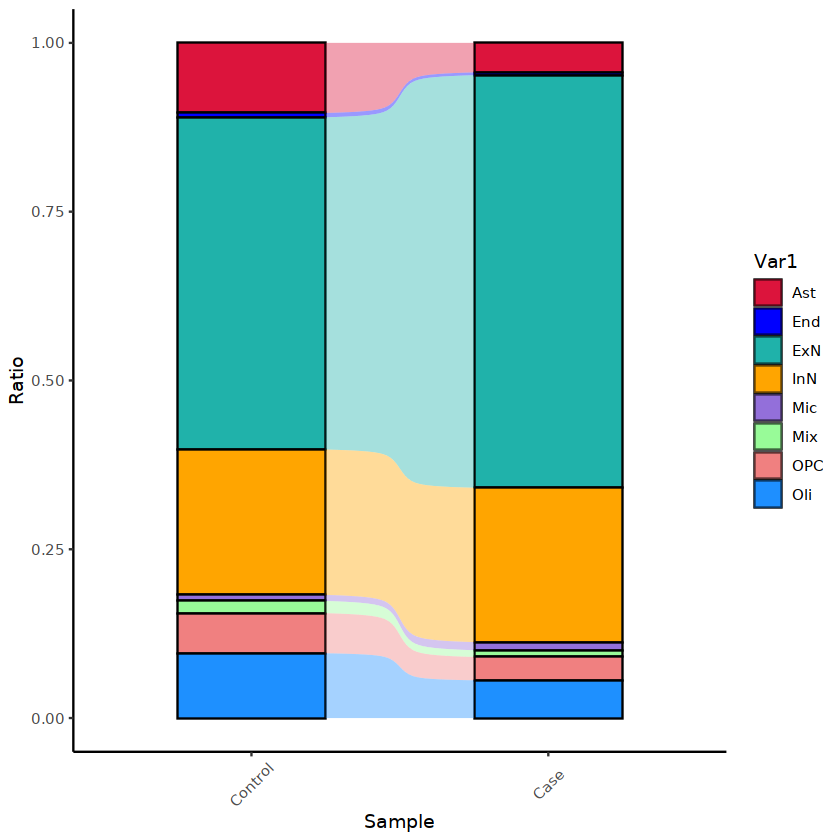

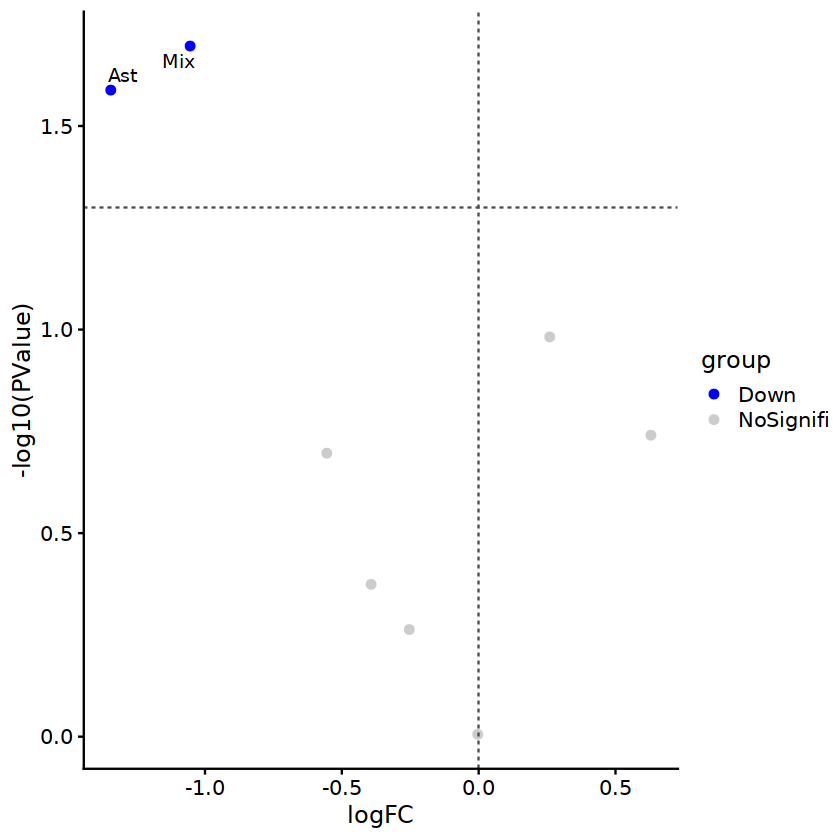

In [66]:
scRNA = count
scedata = scRNA
table(scedata$Condition)#查看各组细胞数
Idents(scedata) = 'celltype'
prop.table(table(Idents(scedata)))
Cellratio <- prop.table(table(Idents(scedata), scedata$Condition), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)
Cellratio$Var2 = factor(Cellratio$Var2,levels = c('Control','Case'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
# ggplot(Cellratio) + 
#   geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
#   theme_classic() +
#   labs(x='Sample',y = 'Ratio')+
#   scale_fill_manual(values = allcolour)+
#   theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

merged = as.SingleCellExperiment(scedata)

abundances <- table(merged$celltype, merged$sample) 




abundances <- unclass(abundances) 

abundances = abundances[,colSums(abundances) > 0]

#library(scater)
library(SingleCellExperiment)
colLabels(merged) <- scedata$celltype
library(DESeq2)
library(limma)
library(edgeR)
table(colLabels(merged), merged$Condition)

extra.info <- colData(merged)[match(colnames(abundances), merged$sample),]

extra.info = na.omit(extra.info)







y.ab <- DGEList(abundances, samples=extra.info)

keep <- filterByExpr(y.ab, group=y.ab$samples$Condition)
y.ab <- y.ab[keep,]

design <- model.matrix(~factor(celltype) + factor(Condition), y.ab$samples)
y.ab <- estimateDisp(y.ab, design, trend="none")
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
res <- glmQLFTest(fit.ab, coef=ncol(design))
summary(decideTests(res))

    diff=topTags(res)$table

diff$logFC = -(diff$logFC)
padj = 0.05
foldChange = 0


    diff$group = as.factor(ifelse(diff$PValue < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
    table(diff$group)
    res = diff

library("edgeR")  
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)
res$group<-factor(res$group,levels=c("Down","NoSignifi","Up"))

    
    top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(PValue, desc(logFC)) %>%
        head(5),
      res %>%
        filter(group == 'Down') %>%
        arrange(PValue, desc(logFC)) %>%
        head(5)
    )
    ggplot(data=res,aes(x=logFC,y=-log10(PValue)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(0),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(PValue),label= rownames(top_5)))+
    scale_color_manual(values = c("blue","grey80","red"))+
    theme_half_open() 

### 女性

In [67]:
count = subset(sce,idents =  'F')


   Case Control 
  49926   31727 


       Ast        End        ExN        InN        Mic        Mix        OPC 
0.09317478 0.04330521 0.40904804 0.13149547 0.03555289 0.03332394 0.04971036 
       Oli 
0.20438931 

     
       Case Control
  Ast  3923    3685
  End  2024    1512
  ExN 20432   12968
  InN  6200    4537
  Mic  1946     957
  Mix  1829     892
  OPC  2183    1876
  Oli 11389    5300

       factor(Condition)Control
Down                          0
NotSig                        8
Up                            0


     Down NoSignifi 
        2         6 

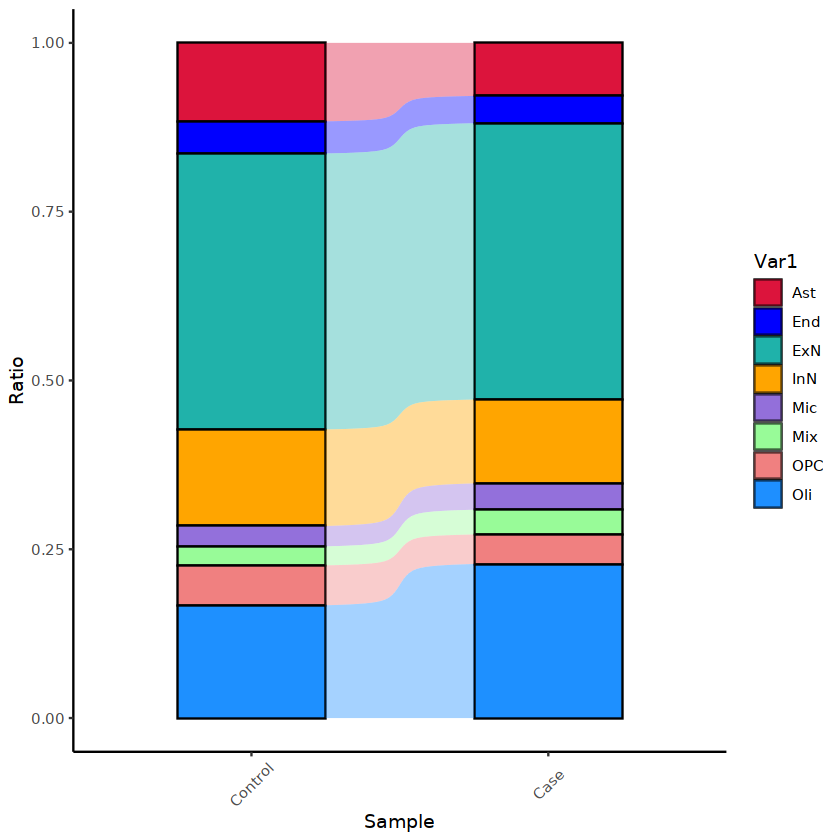

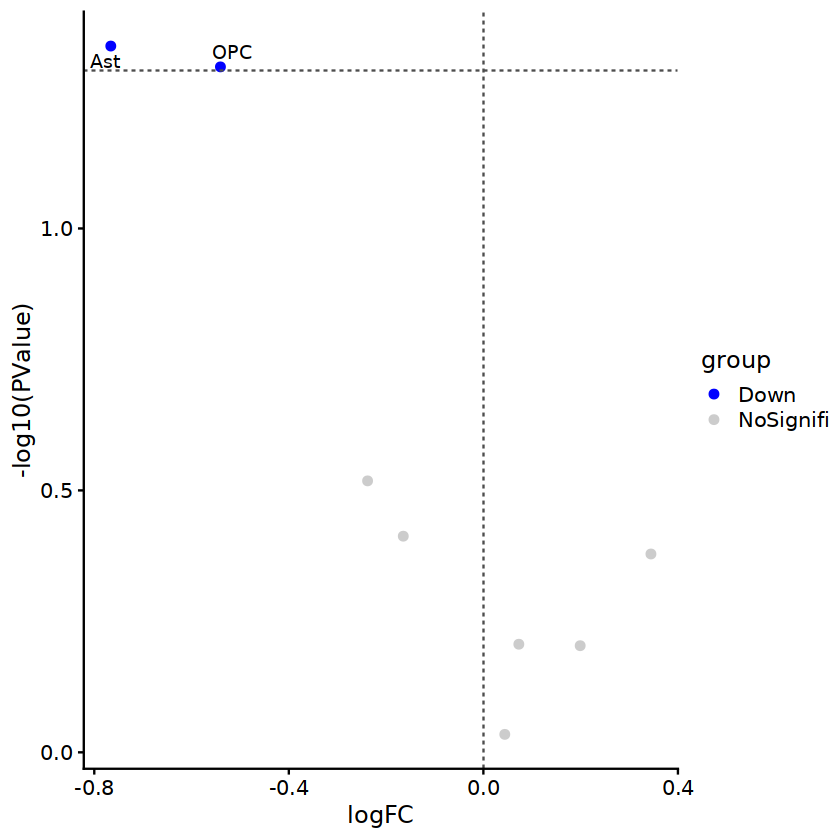

In [68]:
scRNA = count
scedata = scRNA
table(scedata$Condition)#查看各组细胞数
Idents(scedata) = 'celltype'
prop.table(table(Idents(scedata)))
Cellratio <- prop.table(table(Idents(scedata), scedata$Condition), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)
Cellratio$Var2 = factor(Cellratio$Var2,levels = c('Control','Case'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
# ggplot(Cellratio) + 
#   geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
#   theme_classic() +
#   labs(x='Sample',y = 'Ratio')+
#   scale_fill_manual(values = allcolour)+
#   theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

merged = as.SingleCellExperiment(scedata)

abundances <- table(merged$celltype, merged$sample) 




abundances <- unclass(abundances) 

abundances = abundances[,colSums(abundances) > 0]

#library(scater)
library(SingleCellExperiment)
colLabels(merged) <- scedata$celltype
library(DESeq2)
library(limma)
library(edgeR)
table(colLabels(merged), merged$Condition)

extra.info <- colData(merged)[match(colnames(abundances), merged$sample),]

extra.info = na.omit(extra.info)







y.ab <- DGEList(abundances, samples=extra.info)

keep <- filterByExpr(y.ab, group=y.ab$samples$Condition)
y.ab <- y.ab[keep,]

design <- model.matrix(~factor(celltype) + factor(Condition), y.ab$samples)
y.ab <- estimateDisp(y.ab, design, trend="none")
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
res <- glmQLFTest(fit.ab, coef=ncol(design))
summary(decideTests(res))

    diff=topTags(res)$table

diff$logFC = -(diff$logFC)
padj = 0.05
foldChange = 0


    diff$group = as.factor(ifelse(diff$PValue < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
    table(diff$group)
    res = diff

library("edgeR")  
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)
res$group<-factor(res$group,levels=c("Down","NoSignifi","Up"))

    
    top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(PValue, desc(logFC)) %>%
        head(5),
      res %>%
        filter(group == 'Down') %>%
        arrange(PValue, desc(logFC)) %>%
        head(5)
    )
    ggplot(data=res,aes(x=logFC,y=-log10(PValue)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(0),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(PValue),label= rownames(top_5)))+
    scale_color_manual(values = c("blue","grey80","red"))+
    theme_half_open() 